# Single Channel Analysis

In [1]:

import tarfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from experiments.single_channel.experiment import SingleChannelExperiment
from functools import reduce
from parse import parse

data_store = Path("../../data_store/single_channel").absolute()
cgp_file = "C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe"
model_name = "qat_quantized_lenet"
model_path = "./trained_models/qat.quantized_lenet.pth"
relevant_columns = ["error", "energy", "area", "delay", "gate_count"]
fitness_columns = ["error", "quantized_energy", "area", "quantized_delay", "gate_count"]
quantized_columns = ["error", "quantized_energy", "quantized_delay"]

def get_parent_experiement():
    return SingleChannelExperiment.with_data_only(data_store, model_name, model_path, cgp_file)

sns.set_palette("deep")
sns.color_palette("deep")

c:\Users\Majo\.conda\envs\masters\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## Load Data

In [19]:
def create_df(path: str = data_store) -> pd.DataFrame:
    path = Path(path)
    root_experiment = get_parent_experiement()
    for experiment in root_experiment.get_experiments():
        name = experiment.get_name(depth=1)
        result = parse("{layer_name}_mse_{mse}_{rows}_{cols}", name)                
        if result is not None:
            mse = int(result["mse"])
            if mse != 0 and mse != 200:
                mse = int(result["mse"]) ** 2 * 16 * 6
            
            for f in experiment.get_train_statistics():
                csv = pd.read_csv(f)
                csv["mse_threshold"] = mse
                csv["experiment"] = name
                yield csv
    

# experiment = Experiment.with_data_only("../../data_store/zero_outter/conv1_0_0")
df = pd.concat([df for df in create_df()], ignore_index=True)
df.drop(columns="depth", inplace=True, errors="ignore")
df = df[~(
    df["error"].duplicated() & df["quantized_energy"].duplicated() & 
    df["energy"].duplicated() & df["quantized_delay"].duplicated() & 
    df["delay"].duplicated() & df["area"].duplicated() &
    df["gate_count"].duplicated() & df["chromosome"].duplicated())]
df

c:\Users\Majo\.conda\envs\masters\Lib\site-packages\torch\ao\quantization\observer.py:214: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(
c:\Users\Majo\.conda\envs\masters\Lib\site-packages\torch\ao\quantization\observer.py:1207: UserWarning: must run observer before calling calculate_qparams.                                    Returning default scale and zero point 
  warnings.warn(


warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\best_solutions.csv\\train_cgp.config'
warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\chromosomes.txt\\train_cgp.config'
warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_0_30_7.checkpoint.csv\\train_cgp.config'
warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_200_30_7.checkpoint.csv\\train_cgp.config'
warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7.checkpoint.csv\\train_cgp.config'
warn: [Errno 2] No such file or directory: 'c:\\Use

,run,generation,timestamp,error,quantized_energy,energy,area,quantized_delay,delay,gate_count,chromosome,mse_threshold,experiment
0,1,1,0.000285,563514,436212132823338345,0.752571,2800.782374,5.017803e+18,1.39,124,NaN,0,conv1_mse_0_30_7
1,1,2,0.001445,488042,450647447291332140,0.777475,2870.238776,7.255960e+18,2.01,125,NaN,0,conv1_mse_0_30_7
2,1,3,0.006411,483952,451374257556207002,0.778729,2927.962675,6.389577e+18,1.77,130,NaN,0,conv1_mse_0_30_7
3,1,4,0.007673,479057,491485277491445039,0.847931,3152.288082,5.126101e+18,1.42,133,NaN,0,conv1_mse_0_30_7
4,1,5,0.008221,460668,491619670810475112,0.848162,3191.239980,5.126101e+18,1.42,132,NaN,0,conv1_mse_0_30_7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126878,9,1113343,1000.473041,211,0,0.000000,0.000000,0.000000e+00,0.00,63,"{54,96,7,30,2,7,1}([54]43,22,18)([55]9,25,21)(...",301056,conv1_mse_56_30_7
126879,9,1113365,1000.491959,211,0,0.000000,0.000000,0.000000e+00,0.00,60,"{54,96,7,30,2,7,1}([54]43,22,18)([55]9,25,21)(...",301056,conv1_mse_56_30_7
126880,9,1124037,1010.090011,210,0,0.000000,0.000000,0.000000e+00,0.00,61,"{54,96,7,30,2,7,1}([54]43,22,18)([55]9,25,21)(...",301056,conv1_mse_56_30_7
126881,9,1126468,1012.166997,208,0,0.000000,0.000000,0.000000e+00,0.00,61,"{54,96,7,30,2,7,1}([54]43,22,18)([55]9,25,21)(...",301056,conv1_mse_56_30_7


## Data Exploration Analysis

In [12]:
df.describe()

,run,generation,timestamp,error,quantized_energy,energy,area,quantized_delay,delay,gate_count,mse_threshold
count,125898.000000,1.258980e+05,125898.000000,125898.000000,1.258980e+05,125898.000000,125898.000000,1.258980e+05,125898.000000,125898.000000,125898.000000
mean,15.467831,1.577442e+05,78.885354,71464.887242,2.048765e+17,0.353461,1352.217851,2.180093e+18,0.603916,93.773404,146013.894931
std,8.620965,7.527592e+05,399.570261,97140.735596,3.097977e+17,0.534476,1886.476822,2.677886e+18,0.741811,24.227226,113851.211760
min,1.000000,1.000000e+00,0.000073,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,44.000000,0.000000
25%,8.000000,1.014000e+03,0.567930,1354.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,73.000000,200.000000
50%,15.000000,5.079000e+03,2.778388,19372.000000,5.547868e+13,0.000096,28.627299,1.443972e+17,0.040000,91.000000,194400.000000
75%,23.000000,3.217275e+04,17.107585,114278.500000,4.137090e+17,0.713748,2998.826970,4.873406e+18,1.350000,117.000000,249696.000000
max,30.000000,1.510766e+07,9329.387501,691195.000000,1.723589e+18,2.973606,8707.392163,1.404263e+19,3.890000,149.000000,301056.000000


## Evolution Progress

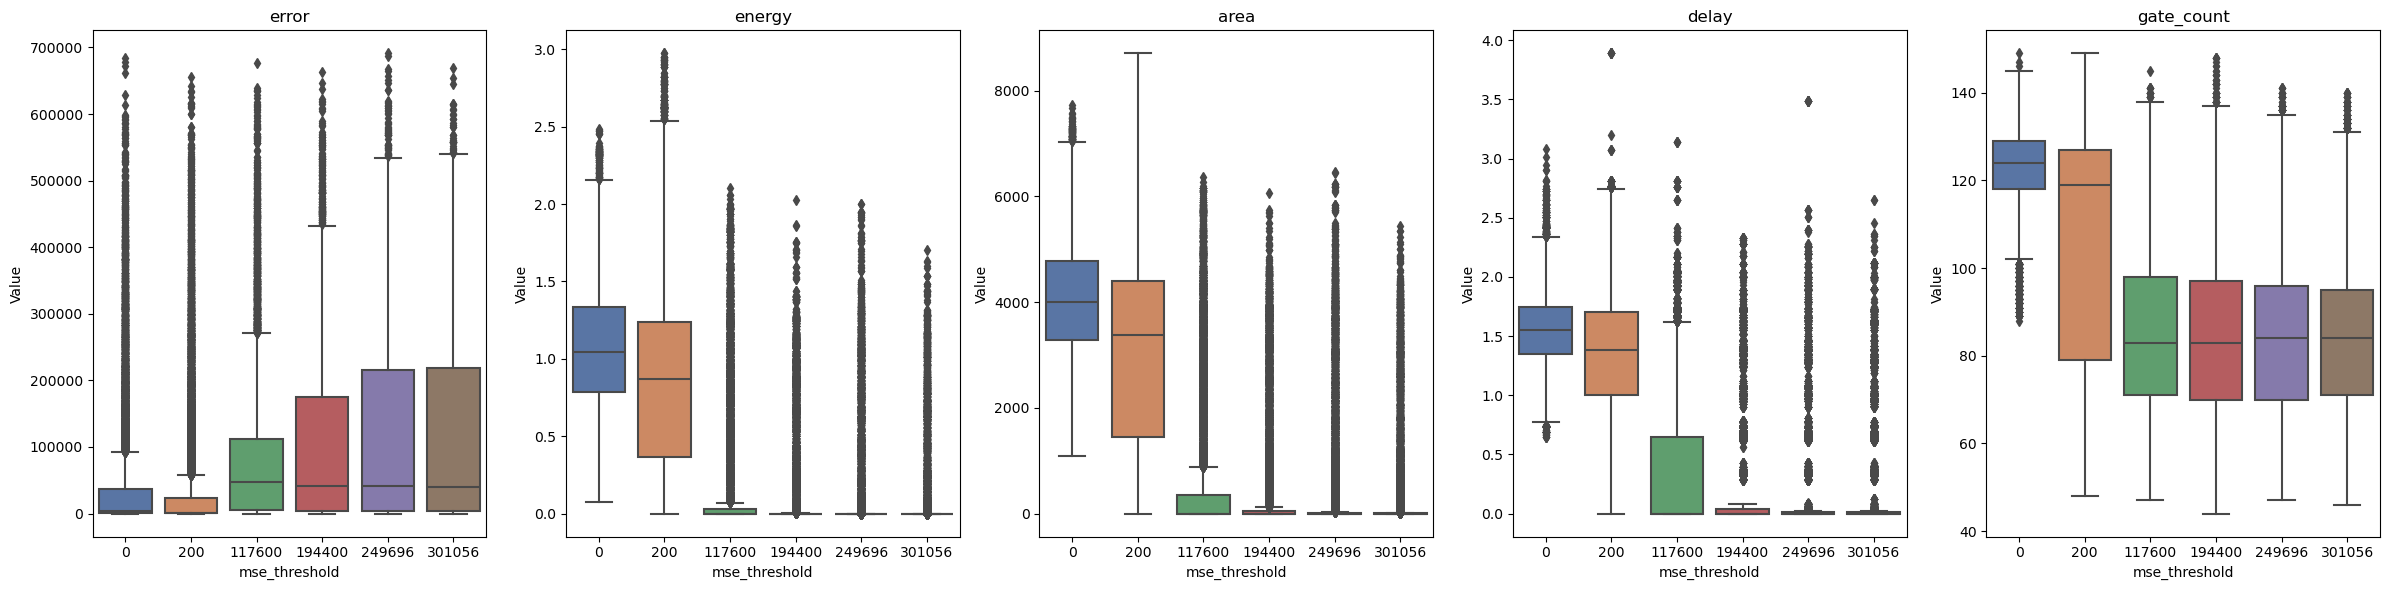

In [13]:
fig, ax = plt.subplots(1, len(fitness_columns), figsize=(24, 6))
plot_df = pd.melt(df, id_vars=["run", "generation", "mse_threshold"], value_vars=relevant_columns, var_name="Metric", value_name="Value")
for i, metric in enumerate(relevant_columns):
    data = plot_df.loc[plot_df["Metric"] == metric, :]
    g = sns.boxplot(data=data, y="Value", x="mse_threshold", ax=ax[i])
    g.set(title=metric)
fig.tight_layout()

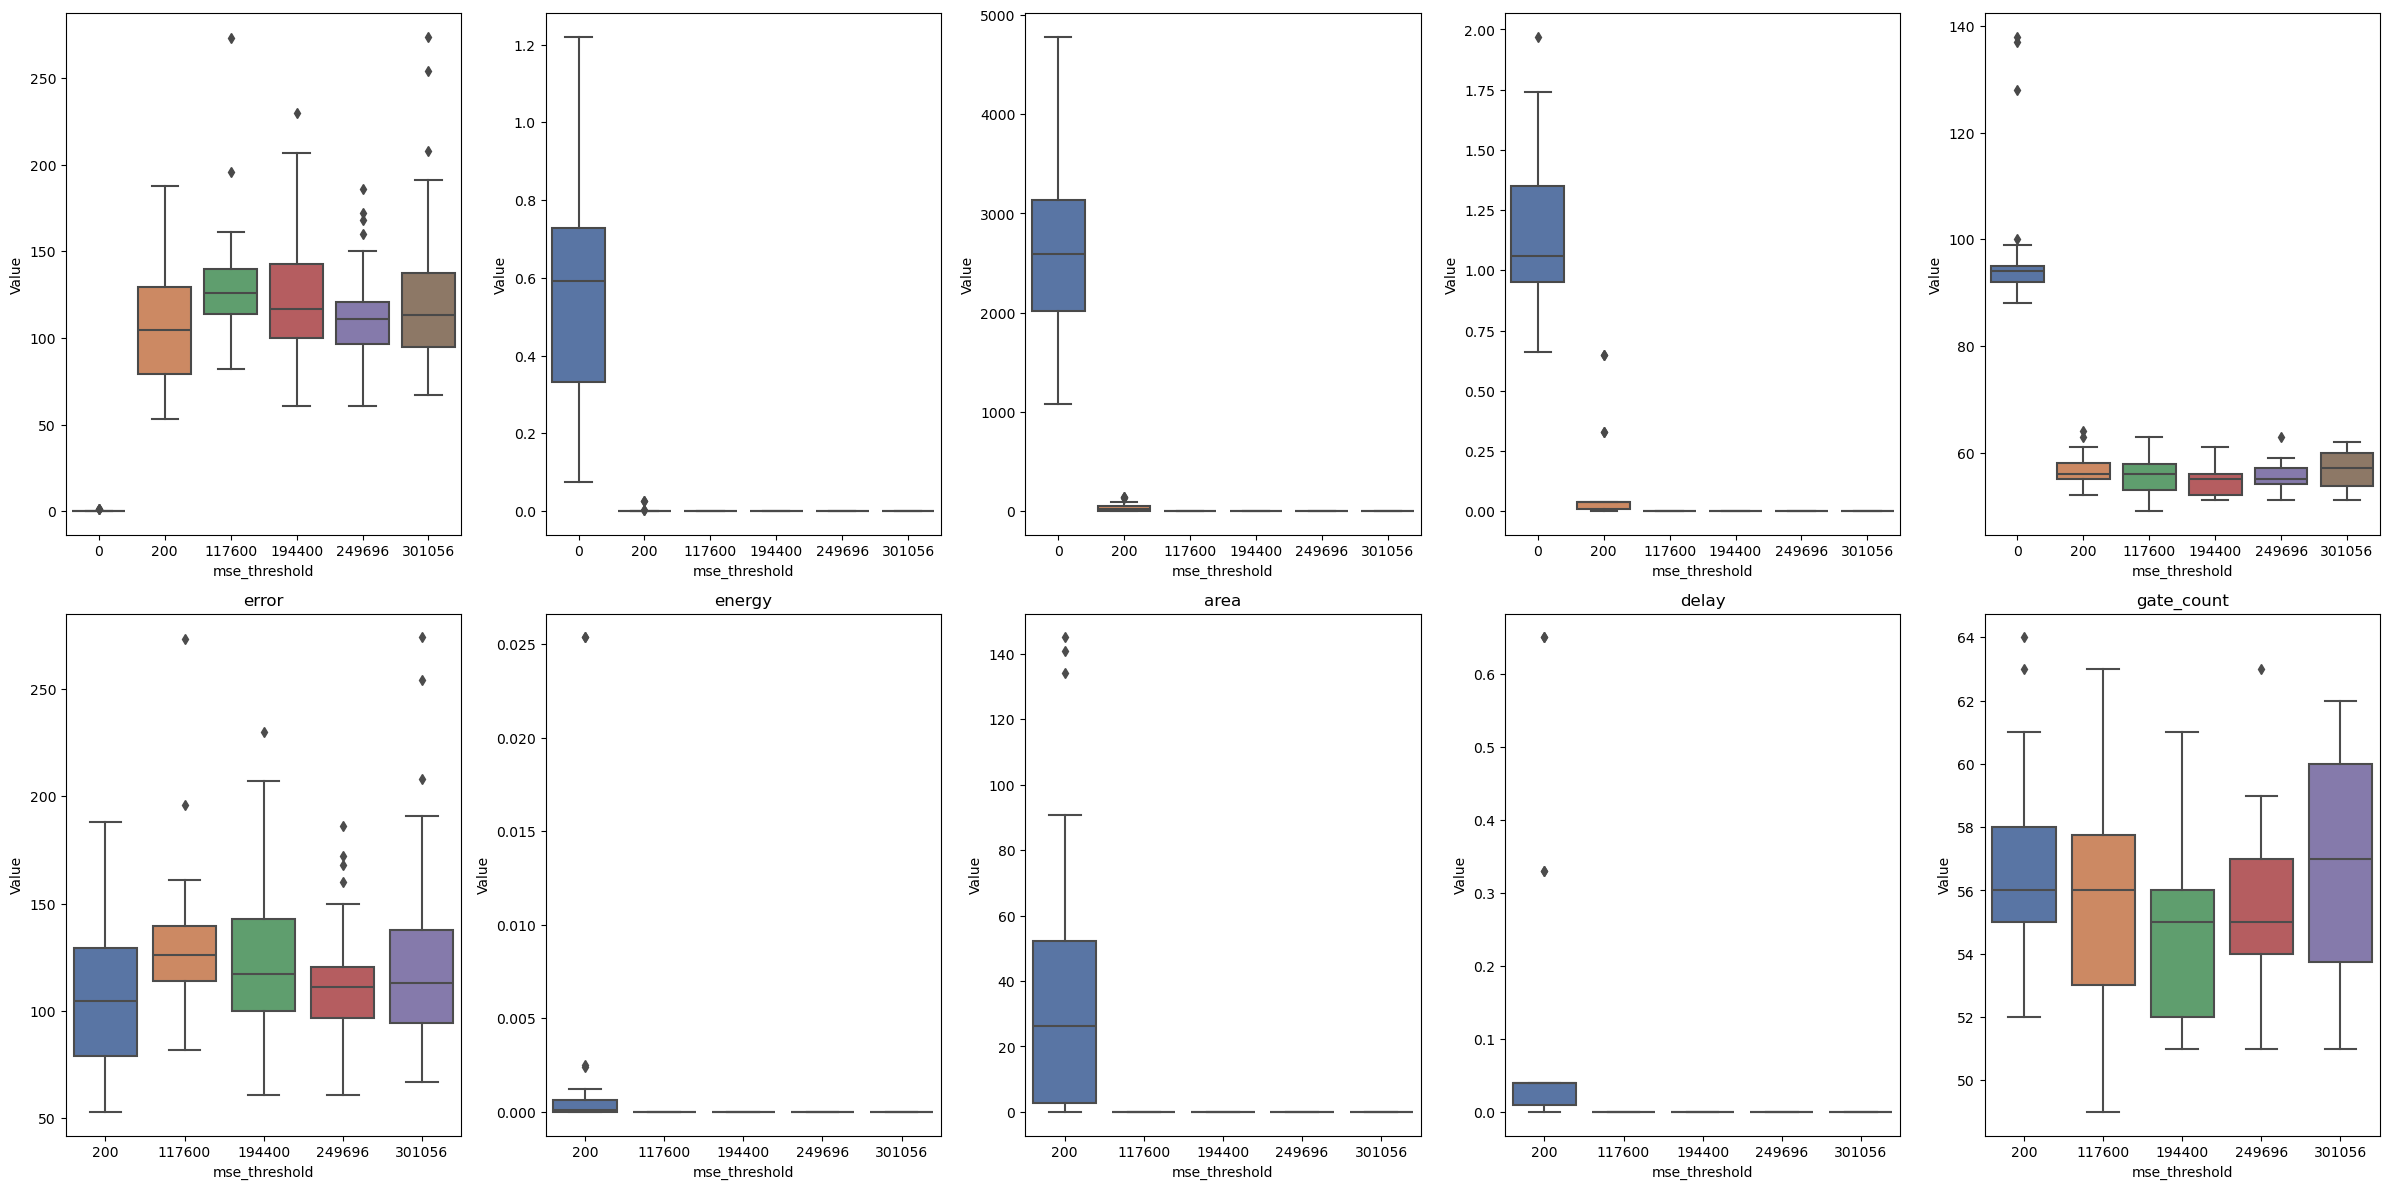

In [17]:
fig, ax = plt.subplots(2, len(fitness_columns), figsize=(24, 12))
ax = ax.flat
best_solutions = []
chromosomes_df = df.dropna()
for threshold in chromosomes_df["mse_threshold"].unique():
    threshold_data = chromosomes_df.loc[chromosomes_df["mse_threshold"] == threshold, :]
    for run in threshold_data["run"].unique():
        run_data = threshold_data.loc[(threshold_data["run"] == run) & (threshold_data["mse_threshold"] <= threshold), :]
        best_solutions.append(run_data.iloc[-1])

solutions_df = pd.DataFrame(data=best_solutions)
plot_df = pd.melt(solutions_df, id_vars=["run", "generation", "mse_threshold"], value_vars=relevant_columns, var_name="Metric", value_name="Value")
for i, metric in enumerate(relevant_columns):
    data = plot_df.loc[plot_df["Metric"] == metric, :]
    g = sns.boxplot(data=data, y="Value", x="mse_threshold", ax=ax[i])
    g = sns.boxplot(data=data.loc[data["mse_threshold"] != 0, :], y="Value", x="mse_threshold", ax=ax[i+len(fitness_columns)])
    g.set(title=metric)    

fig.tight_layout()

solutions_df.to_csv(data_store / "best_solutions.csv", index=False)

In [18]:
# best_solutions_df = pd.read_csv(data_store/"best_solutions.csv")
chromosomes_df = df.loc[~df["chromosome"].isna(), :].copy()
chromosomes_df["Top-1"] = None
chromosomes_df["Top-5"] = None
chromosomes_df["Loss"] = None
patience = 30

print("evaluating:", len(chromosomes_df.index))

chromosome_file = data_store / "chromosomes.txt"
mapping_file = data_store / "mapping.txt"
for x in get_parent_experiement().get_experiments():
    cached_top_k, cached_loss = None, None
    condition = (chromosomes_df["experiment"] == x.get_name(depth=1))
    experiment_df = chromosomes_df.loc[condition, :]
    top_1 = []; top_5 = []; losses = []
    for index, row in experiment_df.iterrows():        
        if x.config.get_mse_threshold() == 0:
            if cached_top_k is None:
                print("error:", row["error"])
                cached_top_k, cached_loss = x.get_reference_model_metrics(cache=False, batch_size=None, top=[1, 5])
            top_1.append(cached_top_k[1])
            top_5.append(cached_top_k[5])
            losses.append(cached_loss)
        else:          
            print("error:", row["error"])
            
            if row["error"] == 0:
                top_1.append(cached_top_k[1])
                top_5.append(cached_top_k[5])
                losses.append(cached_loss)
            else:
                weights = x.evaluate_chromosome(row["chromosome"])
                weights, plans = x.parse_weights(weights)
                model = x._model_adapter.inject_weights(weights, plans)
                top_k, loss = model.evaluate(top=[1, 5], batch_size=None)
                top_1.append(top_k[1])
                top_5.append(top_k[5])
                losses.append(loss)
    chromosomes_df.loc[condition, "Top-1"] = top_1
    chromosomes_df.loc[condition, "Top-5"] = top_5
    chromosomes_df.loc[condition, "Loss"] = losses
    chromosomes_df.loc[condition, :].to_csv(data_store / (x.get_name(depth=1) + ".checkpoint.csv"), index=False)
chromosomes_df.to_csv(data_store / "data.full.csv", index=False)
        
    # x.evaluate_chromosomes(chromosomes_file=chromosome_file, output_statistics="#", output_weights=chromosome_weights)
    
    
    




c:\Users\Majo\.conda\envs\masters\Lib\site-packages\torch\ao\quantization\observer.py:214: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(
c:\Users\Majo\.conda\envs\masters\Lib\site-packages\torch\ao\quantization\observer.py:1207: UserWarning: must run observer before calling calculate_qparams.                                    Returning default scale and zero point 
  warnings.warn(


evaluating: 100048
warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\best_solutions.csv\\train_cgp.config'
warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\chromosomes.txt\\train_cgp.config'
error: 0


Loss: 0.0320, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.22s/batch]


warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_0_30_7.checkpoint.csv\\train_cgp.config'
error: 83


Loss: 0.0320, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.33s/batch]


warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_200_30_7.checkpoint.csv\\train_cgp.config'
error: 82
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]19,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,4,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,52,0)([79]29,5,16)([80]1,21,21)([81]14,28,12)([82]7,36,25)([83]4,17,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,47,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([

Loss: 0.0332, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.41s/batch]


error: 83
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]19,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,4,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,52,0)([79]29,5,16)([80]1,21,21)([81]14,28,12)([82]7,36,25)([83]4,17,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,47,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]23,62,3)([94]57,62,25)([95]1,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]30,59,4)([100]17,25,18)([101]36,67,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0327, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.35s/batch]


error: 92
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]19,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,4,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,52,0)([79]5,5,16)([80]1,21,21)([81]14,28,12)([82]7,36,25)([83]4,17,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,47,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]23,62,3)([94]57,62,25)([95]1,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]30,59,4)([100]17,25,18)([101]36,67,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([107

Loss: 0.0327, Acc: 0.991700, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.27s/batch]


error: 92
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]19,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,4,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,52,0)([79]5,5,10)([80]1,21,21)([81]14,28,12)([82]7,36,25)([83]4,17,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,47,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]23,62,3)([94]57,62,25)([95]1,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]30,59,4)([100]17,25,18)([101]36,67,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([107

Loss: 0.0327, Acc: 0.991700, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.56s/batch]


error: 99
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,4,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,52,0)([79]5,5,10)([80]1,21,21)([81]14,28,12)([82]7,36,25)([83]4,17,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,47,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]23,62,3)([94]57,62,25)([95]1,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]30,59,4)([100]17,25,18)([101]36,67,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([107

Loss: 0.0329, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.20s/batch]


error: 99
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,4,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,52,0)([79]5,5,10)([80]1,21,21)([81]14,28,12)([82]7,36,25)([83]4,17,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,47,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]23,62,3)([94]57,62,25)([95]1,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]30,59,4)([100]17,25,18)([101]36,67,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([107

Loss: 0.0329, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.14s/batch]


error: 107
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,4,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]1,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,47,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]23,62,3)([94]57,62,25)([95]1,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]30,59,4)([100]17,25,18)([101]36,67,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0325, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.19s/batch]


error: 107
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,4,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]1,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,47,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]28,62,3)([94]57,62,25)([95]1,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]30,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0325, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.15s/batch]


error: 107
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]1,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,47,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]28,62,3)([94]57,62,25)([95]1,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]30,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0325, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.32s/batch]


error: 115
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,1,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]28,62,3)([94]57,62,25)([95]1,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]30,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0330, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.46s/batch]


error: 115
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]28,62,3)([94]57,62,25)([95]1,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([1

Loss: 0.0330, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.77s/batch]


error: 131
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,6)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]38,3,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]28,62,3)([94]57,62,25)([95]1,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([1

Loss: 0.0329, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.49s/batch]


error: 132
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,5)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,37,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,3,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]28,23,3)([94]57,62,25)([95]57,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([1

Loss: 0.0329, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.46s/batch]


error: 133
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,5)([64]3,15,10)([65]32,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,3,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]28,23,3)([94]57,62,25)([95]57,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0330, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.63s/batch]


error: 141
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,5)([64]3,15,10)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,3,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,74,18)([93]28,23,3)([94]57,62,25)([95]57,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0326, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.35s/batch]


error: 141
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,5)([64]3,15,10)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]57,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0321, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.75s/batch]


error: 141
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,5)([64]3,15,10)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]57,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0321, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.49s/batch]


error: 145
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,5)([64]3,15,10)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]57,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0328, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.73s/batch]


error: 149
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,5)([64]3,15,10)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]57,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0325, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.49s/batch]


error: 153
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,5)([64]3,15,10)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]57,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,25,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0326, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.57s/batch]


error: 156
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,1,12)([63]33,23,5)([64]3,15,10)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]57,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,56,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([10

Loss: 0.0325, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.95s/batch]


error: 156
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,10)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,56,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,53,21)([106]37,15,20)([1

Loss: 0.0325, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.94s/batch]


error: 157
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,38,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,28,21)([106]37,15,20)([1

Loss: 0.0330, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.05s/batch]


error: 158
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,38,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,28,21)([106]37,15,20)([1

Loss: 0.0327, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.69s/batch]


error: 190
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,2)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,6,7)([71]15,3,15)([72]51,17,25)([73]52,31,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,32,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,38,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,28,21)([106]37,15,20)([1

Loss: 0.0323, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.90s/batch]


error: 199
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]15,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,3)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]51,17,25)([73]52,37,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,57,23)([99]41,59,4)([100]17,38,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,39,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0329, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.88s/batch]


error: 202
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,3)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]51,17,25)([73]52,37,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,23)([99]41,59,4)([100]17,38,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0324, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.13s/batch]


error: 202
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,3)([59]5,46,7)([60]24,40,20)([61]11,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]51,17,25)([73]52,37,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]10,76,20)([92]35,31,18)([93]28,23,3)([94]57,62,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,23)([99]41,59,4)([100]17,38,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0324, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.09s/batch]


error: 202
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]51,17,25)([73]52,37,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]57,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0324, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.73s/batch]


error: 234
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]51,17,25)([73]52,37,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0329, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.64s/batch]


error: 238
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]51,17,25)([73]52,37,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]0,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0327, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.62s/batch]


error: 246
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]51,17,25)([73]52,37,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0330, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.51s/batch]


error: 246
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]51,17,25)([73]52,37,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0330, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.96s/batch]


error: 246
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]51,17,25)([73]52,37,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0330, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.66s/batch]


error: 246
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]51,17,25)([73]52,37,4)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0328, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.18s/batch]


error: 250
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,46,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0326, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.85s/batch]


error: 255
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]60,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0327, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.62s/batch]


error: 263
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0329, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.59s/batch]


error: 271
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0330, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.77s/batch]


error: 275
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,17)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0334, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.16s/batch]


error: 276
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0329, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.76s/batch]


error: 277
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,26,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0325, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:04<00:00,  4.43s/batch]


error: 277
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,22)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,20)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0325, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:04<00:00,  4.75s/batch]


error: 325
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0326, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:04<00:00,  4.47s/batch]


error: 341
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]33,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0328, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:04<00:00,  4.63s/batch]


error: 346
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0328, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.34s/batch]


error: 346
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]9,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0324, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.49s/batch]


error: 346
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0324, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.44s/batch]


error: 346
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0324, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.56s/batch]


error: 346
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0324, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.34s/batch]


error: 361
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]26,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0328, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.38s/batch]


error: 409
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]34,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0328, Acc: 0.991700, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.15s/batch]


error: 409
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]34,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0328, Acc: 0.991700, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.06s/batch]


error: 410
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]34,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,38,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,57,25)([95]82,13,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0329, Acc: 0.991800, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.86s/batch]


error: 426
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]34,41,11)([67]4,36,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0323, Acc: 0.991800, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.93s/batch]


error: 427
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]34,35,11)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0324, Acc: 0.991700, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.73s/batch]


error: 435
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]34,35,11)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,3,15)([72]20,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,6)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0327, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.90s/batch]


error: 435
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,21,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]34,35,11)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,6)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([1

Loss: 0.0324, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.71s/batch]


error: 475
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]34,35,11)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0324, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.83s/batch]


error: 475
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]53,15,9)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,11)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0324, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.78s/batch]


error: 476
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]53,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,11)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)(

Loss: 0.0324, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.75s/batch]


error: 476
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]53,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,11)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)(

Loss: 0.0324, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.97s/batch]


error: 483
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]53,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,11)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)(

Loss: 0.0323, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.92s/batch]


error: 507
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]53,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,11)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,31,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)(

Loss: 0.0327, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.10s/batch]


error: 508
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]53,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]14,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0325, Acc: 0.991800, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.13s/batch]


error: 516
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]53,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]47,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0324, Acc: 0.991900, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.35s/batch]


error: 518
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0322, Acc: 0.992000, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.25s/batch]


error: 534
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]25,34,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0323, Acc: 0.992000, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.49s/batch]


error: 550
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,19)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,34,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0326, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.50s/batch]


error: 554
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,34,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0328, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.58s/batch]


error: 554
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]52,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,34,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([

Loss: 0.0330, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.46s/batch]


error: 579
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]24,40,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]14,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([1

Loss: 0.0329, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.42s/batch]


error: 582
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,40,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,22)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0323, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.42s/batch]


error: 638
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,40,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]42,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,11,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]19,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0323, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.64s/batch]


error: 654
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,40,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0324, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.52s/batch]


error: 662
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,40,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0325, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.19s/batch]


error: 662
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,40,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,11,9)([78]11,28,0)([79]5,5,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0325, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.07s/batch]


error: 662
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,11,9)([78]11,28,0)([79]2,5,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0325, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.02s/batch]


error: 666
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,11,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0322, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.89s/batch]


error: 679
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,11,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]4,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0325, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.85s/batch]


error: 683
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,11,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0320, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.82s/batch]


error: 696
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,11,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,26,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0322, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.80s/batch]


error: 702
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]14,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,11,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,23,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0329, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.81s/batch]


error: 702
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,11,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,43,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0329, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.83s/batch]


error: 710
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]2,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,11,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,43,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0328, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.44s/batch]


error: 714
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]6,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,43,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0325, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  3.00s/batch]


error: 715
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]0,26,18)([75]0,8,15)([76]40,44,16)([77]28,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,43,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0326, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.07s/batch]


error: 723
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]36,26,18)([75]0,8,15)([76]40,44,16)([77]28,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]59,73,18)([86]43,54,7)([87]16,36,1)([88]42,43,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]36,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([1

Loss: 0.0326, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.10s/batch]


error: 730
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]36,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]59,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,24)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([10

Loss: 0.0324, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.35s/batch]


error: 739
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]36,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]59,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0325, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.27s/batch]


error: 763
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]36,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]59,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0327, Acc: 0.991700, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.56s/batch]


error: 812
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]36,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0328, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.64s/batch]


error: 860
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,37,1)([74]36,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,59,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0326, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.48s/batch]


error: 887
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]6

Loss: 0.0325, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.62s/batch]


error: 983
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]6

Loss: 0.0327, Acc: 0.991700, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.40s/batch]


error: 1002
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0327, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.19s/batch]


error: 1010
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0323, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.16s/batch]


error: 1018
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0329, Acc: 0.990800, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.12s/batch]


error: 1018
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0329, Acc: 0.990800, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.01s/batch]


error: 1082
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,3)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,73,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,23,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107]

Loss: 0.0328, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.83s/batch]


error: 1106
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0330, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.81s/batch]


error: 1154
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0323, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.78s/batch]


error: 1187
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0325, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.06s/batch]


error: 1188
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0329, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  3.00s/batch]


error: 1220
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,76,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0327, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.86s/batch]


error: 1244
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,12,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0330, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.16s/batch]


error: 1244
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0330, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.25s/batch]


error: 1245
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0332, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.19s/batch]


error: 1245
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0332, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.49s/batch]


error: 1261
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0325, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:04<00:00,  4.01s/batch]


error: 1293
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]41,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,54,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]36,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]11,28,21)([106]37,15,20)([107

Loss: 0.0328, Acc: 0.991100, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.65s/batch]


error: 1341
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([107

Loss: 0.0328, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.45s/batch]


error: 1377
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([107

Loss: 0.0330, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.52s/batch]


error: 1377
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,35,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,51,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,18)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([107

Loss: 0.0330, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.48s/batch]


error: 1481
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([107]

Loss: 0.0325, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.63s/batch]


error: 1487
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([107]

Loss: 0.0331, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.52s/batch]


error: 1492
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,1)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([107]

Loss: 0.0330, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.61s/batch]


error: 1500
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]3,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([107

Loss: 0.0330, Acc: 0.991600, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.61s/batch]


error: 1512
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,37,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([10

Loss: 0.0332, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.56s/batch]


error: 1536
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([10

Loss: 0.0325, Acc: 0.991500, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.21s/batch]


error: 1551
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]4,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([10

Loss: 0.0331, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.30s/batch]


error: 1560
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]53,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]11,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([1

Loss: 0.0327, Acc: 0.991200, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.97s/batch]


error: 1560
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]53,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]50,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]74,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([1

Loss: 0.0330, Acc: 0.991400, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.92s/batch]


error: 1592
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]53,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]50,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,57,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]46,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([1

Loss: 0.0324, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.83s/batch]


error: 1592
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]53,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]50,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,5)([89]19,57,18)([90]44,71,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]46,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,5,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([1

Loss: 0.0324, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.96s/batch]


error: 1592
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,15,19)([56]53,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,25)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]50,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,14)([89]19,57,18)([90]44,71,18)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]46,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,31,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)(

Loss: 0.0324, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.99s/batch]


error: 1592
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,31,19)([56]53,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,18)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]50,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,14)([89]19,57,18)([90]44,71,10)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]46,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,31,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)(

Loss: 0.0324, Acc: 0.991300, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.15s/batch]


error: 1604
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,31,19)([56]53,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,18)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]50,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,14)([89]19,57,18)([90]44,71,10)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]46,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,31,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)(

Loss: 0.0323, Acc: 0.991800, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.45s/batch]


error: 1604
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,31,19)([56]53,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,18)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]50,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,14)([89]19,57,18)([90]44,71,10)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]46,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,31,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)(

Loss: 0.0323, Acc: 0.991800, Top-5: 1.000000: 100%|██████████| 1/1 [00:02<00:00,  2.90s/batch]


error: 1604
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,31,19)([56]53,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,19)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]50,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,14)([89]19,57,18)([90]44,71,10)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]46,6,13)([98]42,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,31,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)(

Loss: 0.0323, Acc: 0.991800, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.05s/batch]


error: 1604
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,31,19)([56]53,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,19)([73]52,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]50,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,14)([89]19,57,18)([90]44,71,10)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]46,6,13)([98]80,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,31,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)(

Loss: 0.0323, Acc: 0.991800, Top-5: 1.000000: 100%|██████████| 1/1 [00:03<00:00,  3.27s/batch]


error: 1611
['C:\\Users\\Majo\\source\\repos\\TorchCompresser\\out\\build\\x64-release\\cgp\\CGP.exe', 'evaluate:chromosome', 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7\\train_cgp.config', '{54,96,7,30,2,7,1}([54]0,17,22)([55]32,31,19)([56]53,8,6)([57]46,43,17)([58]16,25,25)([59]5,46,7)([60]5,17,20)([61]5,48,15)([62]11,52,12)([63]48,23,5)([64]3,15,21)([65]45,14,0)([66]3,50,3)([67]4,48,19)([68]51,11,19)([69]6,13,7)([70]5,51,7)([71]15,31,15)([72]34,17,19)([73]5,26,10)([74]3,26,18)([75]0,8,15)([76]40,44,16)([77]41,8,9)([78]50,28,0)([79]2,34,10)([80]20,21,21)([81]44,28,12)([82]7,36,25)([83]37,49,12)([84]73,57,17)([85]3,45,18)([86]55,65,7)([87]16,36,1)([88]42,43,14)([89]19,57,18)([90]44,71,10)([91]46,59,18)([92]35,51,18)([93]28,29,3)([94]78,21,25)([95]82,44,17)([96]62,13,15)([97]46,6,13)([98]80,38,6)([99]41,70,6)([100]17,38,7)([101]81,69,19)([102]9,31,17)([103]26,13,21)([104]47,49,15)([105]52,28,21)([106]37,15,20)([

  0%|          | 0/1 [00:03<?, ?batch/s]


KeyboardInterrupt: 

In [4]:
import torch

headers = ["Top-1", "Top-5", "Loss"]
for x in get_parent_experiement().get_experiments():
    data_file = data_store / x.get_name(depth=1) / "model_accuracy.csv"
    if data_file.exists(): continue
    
    data = []
    cached_top_k, cached_loss = None, None
    for run in x.get_infered_weights_run_list():
        if x.config.get_mse_threshold() == 0:
            if cached_top_k is None:
                cached_top_k, cached_loss = x.get_reference_model_metrics(cache=False, batch_size=None, top=[1, 5])
            data.append(list(cached_top_k.values()) + [cached_loss])
        else:          
            weights, plans = x.get_weights(file=run)
            model = x._model_adapter.inject_weights(weights, plans)
            top_k, loss = model.evaluate(top=[1, 5], batch_size=None)
            data.append(list(top_k.values()) + [loss])

    best_accuracies_df = pd.DataFrame(data=data, columns=headers)
    best_accuracies_df.to_csv(data_file)

    
    
    


warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\best_solutions.csv\\train_cgp.config'
warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\chromosomes.txt\\train_cgp.config'
warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_35_30_7.tar\\train_cgp.config'
warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_45_30_7.tar\\train_cgp.config'
warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCompresser\\cmd\\compress\\..\\..\\data_store\\single_channel\\conv1_mse_51_30_7.tar\\train_cgp.config'
warn: [Errno 2] No such file or directory: 'c:\\Users\\Majo\\source\\repos\\TorchCom

c:\Users\Majo\.conda\envs\masters\Lib\site-packages\torch\ao\quantization\observer.py:214: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(
c:\Users\Majo\.conda\envs\masters\Lib\site-packages\torch\ao\quantization\observer.py:1207: UserWarning: must run observer before calling calculate_qparams.                                    Returning default scale and zero point 
  warnings.warn(


c:\Users\Majo\.conda\envs\masters\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Majo\.conda\envs\masters\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Majo\.conda\envs\masters\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Majo\.conda\envs\masters\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: xlabel='generation', ylabel='energy'>

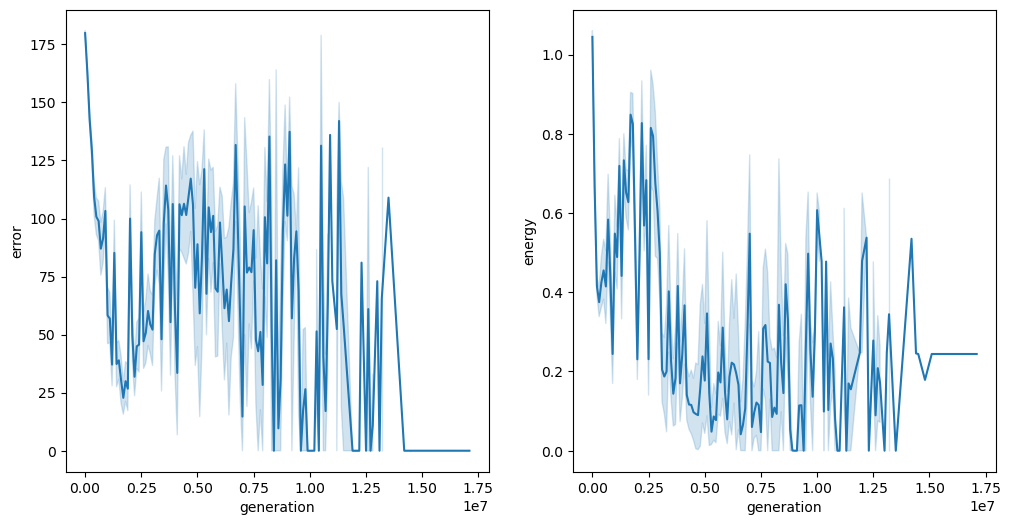

In [27]:
plot_df = df.dropna().copy()

epoch = 100000
for gen in range(0, plot_df["generation"].max() + epoch, epoch):
    plot_df.loc[plot_df["generation"].isin(range(gen, gen+epoch)), "generation"] = gen

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# quantized_df = pd.melt(quantized_df, id_vars=["run", "generation"], value_vars=["error", "energy"], var_name="metric", value_name="value")
sns.lineplot(data=plot_df, x="generation", y="error", ax=ax[0])
sns.lineplot(data=plot_df, x="generation", y="energy", ax=ax[1])


,run,generation,timestamp,error,quantized_energy,energy,area,quantized_delay,delay,gate_count,chromosome,mse_threshold
0,18,1,0.000117,590731,863396601526242104,1.489567,5057.176763,7.436457e+18,2.06,127,NaN,0
1,18,2,0.000614,506512,722858052316161026,1.247104,4376.691775,7.147662e+18,1.98,128,NaN,0
2,18,3,0.000990,486166,635018900536942104,1.095561,4010.168477,7.147662e+18,1.98,130,NaN,0
3,18,4,0.001383,479210,557766275183052504,0.962281,3706.531381,7.147662e+18,1.98,129,NaN,0
4,18,5,0.003572,477671,555890131549861855,0.959044,3648.338183,7.147662e+18,1.98,129,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40504,8,6720915,4400.005669,155,377194231697396,0.000651,86.351197,1.443972e+17,0.04,56,"{54,96,7,30,2,7,1}([54]51,39,19)([55]21,11,18)...",200
40505,8,6721133,4400.128377,152,377194231697396,0.000651,86.351197,1.443972e+17,0.04,56,"{54,96,7,30,2,7,1}([54]51,39,19)([55]21,11,18)...",200
40506,8,6723828,4401.674913,151,377194231697396,0.000651,86.351197,1.443972e+17,0.04,56,"{54,96,7,30,2,7,1}([54]51,39,19)([55]21,11,18)...",200
40507,8,6779021,4433.393330,150,377194231697396,0.000651,86.351197,1.443972e+17,0.04,57,"{54,96,7,30,2,7,1}([54]51,39,19)([55]21,11,18)...",200


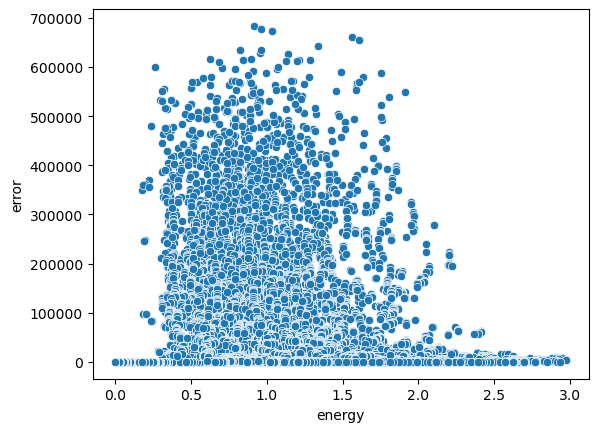

In [10]:
sns.scatterplot(data=df.loc[df["error"].notna() & df["energy"].notna()], x="energy", y="error")
# plt.show()
df